In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [2]:
np.random.seed(42)
X = np.linspace(0, 10, 20)
y = 2 * X + 1 + np.random.randn(20) * 8
X, y

(array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
 array([ 4.97371322,  0.94651717,  8.28677146, 16.34213359,  3.33729932,
         4.39006224, 19.949492  , 14.50789889,  5.66525754, 14.81416456,
         7.81897425,  8.85310934, 15.56727712, -0.62203143,  1.93749945,
        12.29117345,  9.7394563 , 21.4087155 , 12.68317582,  9.70157039]))

In [5]:

X_poly = np.vstack([X**i for i in range(1, 10)]).T
X_poly

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.26315789e-01, 2.77008310e-01, 1.45793847e-01, 7.67336039e-02,
        4.03861073e-02, 2.12558460e-02, 1.11872874e-02, 5.88804597e-03,
        3.09897157e-03],
       [1.05263158e+00, 1.10803324e+00, 1.16635078e+00, 1.22773766e+00,
        1.29235543e+00, 1.36037414e+00, 1.43197278e+00, 1.50733977e+00,
        1.58667344e+00],
       [1.57894737e+00, 2.49307479e+00, 3.93643388e+00, 6.21542192e+00,
        9.81382408e+00, 1.54955117e+01, 2.44665974e+01, 3.86314696e+01,
        6.09970573e+01],
       [2.10526316e+00, 4.43213296e+00, 9.33080624e+00, 1.96438026e+01,
        4.13553739e+01, 8.70639451e+01, 1.83292516e+02, 3.85878981e+02,
        8.12376802e+02],
       [2.63157895e+00, 6.92520776e+00, 1.82242309e+01, 4.79585025e+01,
        1.26206585e+02, 3.32122593e+02, 8.74006824e+02, 2.30001796e+03,
        6.0

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

In [8]:
X_test = np.linspace(0, 10, 200)
X_test_poly = np.vstack([X_test ** i for i in range(1, 10)]).T
y_pred = lr.predict(X_test_poly)

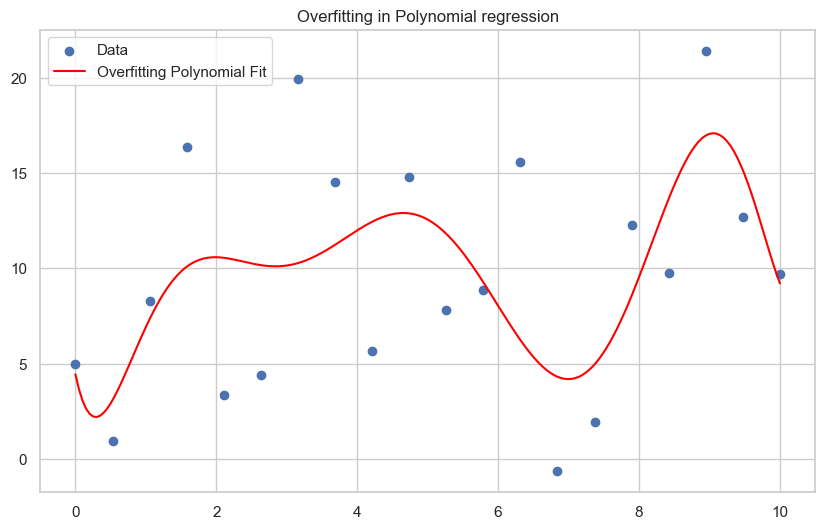

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Overfitting Polynomial Fit')
plt.title('Overfitting in Polynomial regression')
plt.legend()
plt.show()

c:\Users\Mritunjay Paswan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.12349e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mritunjay Paswan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.36251e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mritunjay Paswan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.17545e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mritunjay Paswan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.36325e-17): resul

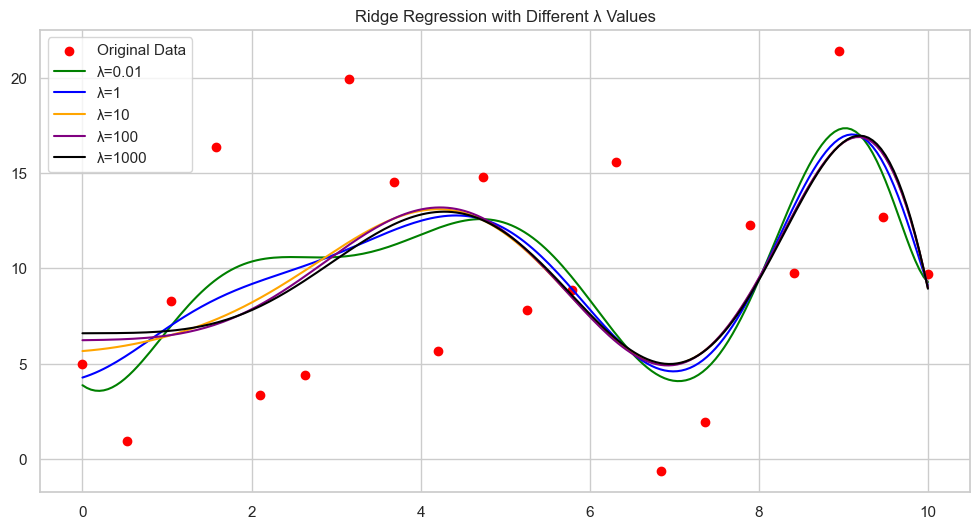

In [10]:
from sklearn.linear_model import Ridge

# Try different lambdas
lambdas = [0.01, 1, 10, 100, 1000]
colors = ['green', 'blue', 'orange', 'purple', 'black']

plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Original Data", color='red')

for l, c in zip(lambdas, colors):
    ridge = Ridge(alpha=l)
    ridge.fit(X_poly, y)
    y_ridge = ridge.predict(X_test_poly)
    plt.plot(X_test, y_ridge, label=f"λ={l}", color=c)

plt.title("Ridge Regression with Different λ Values")
plt.legend()
plt.show()


In [11]:
ridge = Ridge(alpha=1)
ridge.fit(X_poly, y)

lr = LinearRegression()
lr.fit(X_poly, y)

print("Linear Regression Coefficients:\n", lr.coef_)
print("Ridge Regression Coefficients (λ=1):\n", ridge.coef_)


Linear Regression Coefficients:
 [-1.76722178e+01  4.26300121e+01 -3.20094628e+01  1.14741846e+01
 -2.12728394e+00  1.90517987e-01 -4.47059260e-03 -4.11702926e-04
  2.12727324e-05]
Ridge Regression Coefficients (λ=1):
 [ 1.39415160e+00  1.68459383e+00  3.02477878e-01 -1.39180720e+00
  7.82966859e-01 -1.99226501e-01  2.60425071e-02 -1.69695704e-03
  4.36384726e-05]


c:\Users\Mritunjay Paswan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.36251e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
